<a href="https://colab.research.google.com/github/Ronith-droid/Analog-clock/blob/master/demotask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#part1

In [2]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7517e4e51c51a289723edb0a106d740f8cdd8f42104d2bc230a2fb3cd1efb884
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

In [8]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
#loading the csv file

df = spark.read.load('2020T2Data.csv',format="csv", sep=",",inferSchema="true",  header="true")

df.show(2)
len(df.columns)

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|        Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body Type|Real Face

64

In [9]:
#Which are the (min, mean and max) for Age
df.select("Age").describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|             18207|
|   mean|25.122205745043114|
| stddev| 4.669942713414287|
|    min|                16|
|    max|                45|
+-------+------------------+



In [10]:
#Which are the (min, mean and max) for Overall

df.select("Overall").describe().show()

+-------+------------------+
|summary|           Overall|
+-------+------------------+
|  count|             18207|
|   mean| 66.23869940132916|
| stddev|6.9089296118831784|
|    min|                46|
|    max|                94|
+-------+------------------+



In [11]:

#Which position the talented player (based on Avg Overall) are playing?
from pyspark.sql import functions as F
Pos=df.groupBy("Position").agg(F.mean('Overall')).orderBy("avg(Overall)",ascending=False)
Pos.show(3)


+--------+-----------------+
|Position|     avg(Overall)|
+--------+-----------------+
|      LF|73.86666666666666|
|      RF|            73.25|
|     RAM|72.28571428571429|
+--------+-----------------+
only showing top 3 rows



In [12]:

#Which are the top 3 countres that most likely have the genies player (based on sort of Avg Overall) and
from pyspark.sql import functions as F
Country=df.groupBy("Nationality").agg(F.mean('Overall')).orderBy("avg(Overall)",ascending=False)
Country.show(3)

+--------------------+-----------------+
|         Nationality|     avg(Overall)|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



In [13]:
#Your code to identify top 10 countryes by alphabet

position=df.groupBy("Nationality","Position").agg(F.mean("Potential")).orderBy("Nationality",ascending=True)#
position.select("Nationality",).distinct().show()#unique top 10 countries by alphabet
position.show(20)#tabel of columns

+------------------+
|       Nationality|
+------------------+
|       Afghanistan|
|           Albania|
|           Algeria|
|           Andorra|
|            Angola|
| Antigua & Barbuda|
|         Argentina|
|           Armenia|
|         Australia|
|           Austria|
|        Azerbaijan|
|          Barbados|
|           Belarus|
|           Belgium|
|            Belize|
|             Benin|
|           Bermuda|
|           Bolivia|
|Bosnia Herzegovina|
|          Botswana|
+------------------+
only showing top 20 rows

+-----------+--------+-----------------+
|Nationality|Position|   avg(Potential)|
+-----------+--------+-----------------+
|Afghanistan|      LM|             70.0|
|Afghanistan|      LB|             64.0|
|Afghanistan|     CAM|             66.0|
|Afghanistan|      CM|             71.0|
|    Albania|      ST|            72.25|
|    Albania|     RCM|             75.0|
|    Albania|      CM|            71.75|
|    Albania|      CB|74.33333333333333|
|    Albania|     L

In [0]:

#Your Code to identify which position has the most talend young players in Australia



In [14]:
#visualize of plot 
from pyspark.sql.functions import  avg
visual=df.groupBy("Age").agg(avg("Potential"), avg("Overall")).orderBy("Age",ascending=True)
visual.show()

+---+-----------------+------------------+
|Age|   avg(Potential)|      avg(Overall)|
+---+-----------------+------------------+
| 16|73.19047619047619| 54.45238095238095|
| 17|74.33910034602076| 56.40484429065744|
| 18|73.53005464480874| 57.74180327868852|
| 19|     73.146484375|     59.5830078125|
| 20|73.21370967741936|61.858870967741936|
| 21|72.95783555867885| 63.48067463106114|
| 22|72.81940298507463| 64.99402985074627|
| 23|72.55555555555556| 66.24474474474475|
| 24|72.07952871870398| 67.30633284241532|
| 25|71.29037149355572| 67.97346474601972|
| 26|70.17664023071377| 68.51478010093727|
| 27| 69.7091222030981| 68.94922547332186|
| 28| 69.4441416893733| 69.21344232515895|
| 29|69.35766423357664|  69.2460896767466|
| 30|69.70010905125409| 69.69574700109051|
| 31|69.85007072135785| 69.85007072135785|
| 32|69.52961672473867| 69.52961672473867|
| 33|69.55882352941177| 69.55882352941177|
| 34|69.53960396039604| 69.53960396039604|
| 35|68.13265306122449| 68.13265306122449|
+---+------

In [15]:
visual_plot=visual.toPandas()
visual_plot.head(5)

,Age,avg(Potential),avg(Overall)
0,16,73.190476,54.452381
1,17,74.339100,56.404844
2,18,73.530055,57.741803
3,19,73.146484,59.583008
4,20,73.213710,61.858871


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

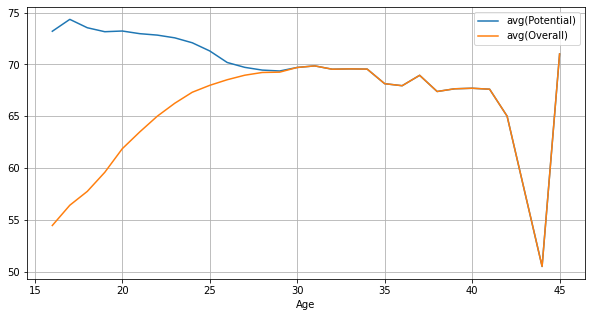

In [17]:
visual_plot.plot(x='Age', y=['avg(Potential)','avg(Overall)' ], figsize=(10,5), grid=True)
#xlabel
#ylabel
#title
#intersection of 2 lines is answer for this question

In [0]:
#part2

In [0]:

#given
DEF = ["LB","LWB","RB","LCB","RCB","CB","RWB"] 
FWD = ["RF","LF","LW","RS","RW","LS","CF","ST"] 
MID = ["LCM","LM","RDM","CAM","RAM","RCM","CM","CDM","RM","LAM","LDM"]

In [19]:
# Your code to select relevent features and filtering by leaving out the GK
#removing goal keeper from position
nogk=df
nogk=df.filter(df.Position!="GK")
nogk.show()


+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

In [0]:
columstokeep=["ID","Position","Height(CM)", "Weight(KG)", "Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration", "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower", "Jumping", "Stamina", "Strength", "LongShots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties", "Composure", "Marking", "StandingTackle", "SlidingTackle"]
for column in nogk.columns:
  if column not in columstokeep:
    nogk=nogk.drop(column)
  #removing gk from position and only using the given attributes

In [0]:
nogk.show(2)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+------

In [0]:
nogk=nogk.withColumn('Positin_Group',F.when(F.col("Position").isin(DEF),'DEF').when(F.col("Position").isin(FWD),"FWD").when(F.col("Position").isin(MID),"MID"))

In [22]:
nogk.show(10)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Positin_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+-----

In [0]:
df_kmeans_new=nogk

In [24]:
df_kmeans_new.show(5)

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Positin_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+-----

In [25]:
df_kmeans_new


DataFrame[ID: int, Position: string, Height(CM): double, Weight(KG): double, Crossing: int, Finishing: int, HeadingAccuracy: int, ShortPassing: int, Volleys: int, Dribbling: int, Curve: int, FKAccuracy: int, LongPassing: int, BallControl: int, Acceleration: int, SprintSpeed: int, Agility: int, Reactions: int, Balance: int, ShotPower: int, Jumping: int, Stamina: int, Strength: int, LongShots: int, Aggression: int, Interceptions: int, Positioning: int, Vision: int, Penalties: int, Composure: int, Marking: int, StandingTackle: int, SlidingTackle: int, Positin_Group: string]

In [26]:
columns_to_drop = ['Position', 'Positin_Group']
df_kmeans_new = df_kmeans_new.drop(*columns_to_drop)
df_kmeans_new.show(5)

+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+----------

In [27]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select("ID","features")
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



In [28]:
df_kmeans_new

DataFrame[ID: int, Height(CM): double, Weight(KG): double, Crossing: int, Finishing: int, HeadingAccuracy: int, ShortPassing: int, Volleys: int, Dribbling: int, Curve: int, FKAccuracy: int, LongPassing: int, BallControl: int, Acceleration: int, SprintSpeed: int, Agility: int, Reactions: int, Balance: int, ShotPower: int, Jumping: int, Stamina: int, Strength: int, LongShots: int, Aggression: int, Interceptions: int, Positioning: int, Vision: int, Penalties: int, Composure: int, Marking: int, StandingTackle: int, SlidingTackle: int]

ValueError: ignored